In [1]:
import pandas as pd
import numpy as np

def read_csv(fileIn):
    return pd.read_csv(fileIn, names=['symmetry', 'average intensity', 'label'])

def gen_df(df):
    return df.iloc[:, :-1], df.iloc[:, -1:]

def append_offset_col(df, initial_frame):
    df.insert(0, 'offset', np.ones(len(initial_frame)))

def plot_scatter_plot(df, value):
    df.plot.scatter(
    'symmetry',
    'average intensity',
    c=['green' if int(i) == 1 else 'red' for i in value.values])

def classify_prediction(y, theta, x):
    # y(theta*x)
    # theta cdot x >= 0, 1
    # theta cdot x < 0, -1
    h = 1 if np.dot(x, theta) >= 0 else -1
    return h == y


def calculate_training_error(theta, X, Y):
    err = 0
    for t in range(X.shape[0]):
        if not classify_prediction(Y[t], theta, X[t]):
            err += 1
    return err

train_frame = read_csv('1/train_1_5.csv')
test_frame = read_csv('1/test_1_5.csv')

train_X, train_y = gen_df(train_frame)
test_X, test_y = gen_df(test_frame)
append_offset_col(train_X, train_frame)
append_offset_col(test_X, test_frame)

def run_epoch(epoch):
    theta = np.zeros((train_X.shape[1]))
    print(
        f"initial training error: {calculate_training_error(theta, train_X.values, train_y.values)/train_X.shape[0]}\n"
    )
    for epoch in range(epoch):
        for t in range(train_X.shape[0]):
            if not classify_prediction(train_y.values[t % train_X.shape[0]], theta,
                                train_X.values[t % train_X.shape[0]]):
                theta = theta + train_y.values[
                    t % train_X.shape[0]] * train_X.values[t % train_X.shape[0]]


        print(f"epoch: {epoch}")
        print(f"theta: {theta}")
        print(
            f"accuracy: {1-calculate_training_error(theta, test_X.values, test_y.values) / test_X.shape[0]}"
        )

num = 1
print(f"2a) After running {num} epoch...")
run_epoch(1)

num = 5
print(f"\n2b) After running {num} epoch...")
run_epoch(5)

2a) After running 1 epoch...
initial training error: 0.3672431332655137

epoch: 0
theta: [ 0.         -2.51402919 -6.06354853]
accuracy: 0.9660678642714571

2b) After running 5 epoch...
initial training error: 0.3672431332655137

epoch: 0
theta: [ 0.         -2.51402919 -6.06354853]
accuracy: 0.9660678642714571
epoch: 1
theta: [ 0.         -2.6151644  -7.22348722]
accuracy: 0.9650698602794411
epoch: 2
theta: [ 0.         -2.23439866 -7.95339052]
accuracy: 0.9510978043912176
epoch: 3
theta: [ 0.         -1.68899683 -8.94830507]
accuracy: 0.8932135728542914
epoch: 4
theta: [ 1.         -2.05719114 -9.15769946]
accuracy: 0.9710578842315369


3a) Theta:  [1.78157138 3.2447227 ]
Training Error:  0.5812605752543938
3b) Theta:  [0.00156322 0.00122478]
Training Error:  13.771874611911194
[1.11846512 3.52394943 0.08090267 0.13787504]
3d) Training Error:  0.5700844364691349
Order: 3 | Error: 0.5700844364691349
Order: 4 | Error: 0.5646163879286425
Order: 5 | Error: 0.5638968184749201
Order: 6 | Error: 0.5613433038902952
Order: 7 | Error: 0.5562352515820607
Order: 8 | Error: 0.5537805799171975
Order: 9 | Error: 0.5529231154063511
Order: 10 | Error: 0.5526261832723347
Order: 11 | Error: 0.5534280688278685
Order: 12 | Error: 0.5511216464874193
Order: 13 | Error: 0.5498817631501461
Order: 14 | Error: 0.5497959463284029
Order: 15 | Error: 0.5513481508106223
Order is best at:  14


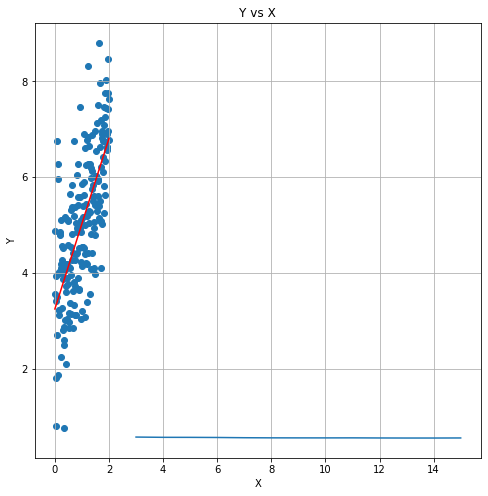

In [2]:
from random import seed, randrange
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

def read_csv(fileIn):
    return pd.read_csv(fileIn, header=None)

def append_offset_col(df, initial_frame):
    df.insert(1, 'offset', np.ones(len(initial_frame)))

def get_theta(X, y):
    n = len(X)
    A = 1 / n * X.T @ X
    b = 1 / n * X.T @ y

    theta = np.dot(np.linalg.pinv(A), b)

    return theta.T[0]

def create_poly_features(X, degree):
    x1 = X.iloc[:, :1]

    for i in range(2, degree + 1):
        name = f'x^{i}'
        X.insert(X.shape[1], name, np.power(x1, i))

    return X

def plot_scatter_plot(X, y, theta):
    plt.figure(figsize=(8, 8))
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Y vs X')
    plt.grid(True)

    x = np.linspace(0, 2, 100)
    x_w_offset = pd.DataFrame(x)
    append_offset_col(x_w_offset, x)

    # print(theta.shape[0])
    x_w_offset = create_poly_features(x_w_offset, theta.shape[0] - 1)

    # print(x_w_offset.values.shape)
    y = np.mat(x_w_offset.values) * np.mat(theta).T
    plt.plot(x, y, 'r')

def calculate_training_error(X, y, theta):
    X = np.mat(X)
    y = np.mat(y)
    theta = np.mat(theta).T
    predicted_y = np.dot(X, theta) # y = X cdot theta
    error = predicted_y - y # err = y - f(theta, x)
    squared_error = np.power(error, 2)
    sum_squared_error = np.sum(squared_error)
    squared_error = sum_squared_error / (2 * X.shape[0])

    return squared_error

    

X_frame = read_csv('2/hw1x.dat')
X_frame_w_offset = deepcopy(X_frame)
append_offset_col(X_frame_w_offset, X_frame)
y_frame = read_csv('2/hw1y.dat')


theta = get_theta(X_frame_w_offset.values, y_frame.values)
print('3a) Theta: ', theta)

plot_scatter_plot(X_frame.values, y_frame.values, theta)
error = calculate_training_error(X_frame_w_offset.values, y_frame.values, theta)
print('Training Error: ', error)


seed(6)

def stochastic_gradient_descent(X, y, theta, alpha, iters):
    X = np.mat(X)
    y = np.mat(y)
    theta = np.mat(theta).T
    for _ in range(iters):

        # choose a random sample from a range within X
        sample = randrange(X.shape[0])

        # error = (X * theta) - y
        # gradient = X.T * error # transpose X features, to solve for matrix vector product, X is 100 * n, error is 100*1
        # increment = alpha / X.shape[0] * gradient
        # theta = theta-increment
        theta = theta + alpha / X.shape[0] * (X[sample].T * (y[sample] - (X[sample] * theta)))
    return np.array(theta.T)[0]

alpha = 0.01
iters = 5
theta = np.zeros(X_frame_w_offset.shape[1])

# perform gradient descent
theta = stochastic_gradient_descent(X_frame_w_offset.values, y_frame.values,
                                    theta, alpha, iters)
print('3b) Theta: ', theta)

training_error = calculate_training_error(X_frame_w_offset.values,
                                               y_frame.values, theta)
print('Training Error: ', training_error)



X_frame_w_offset_deg_3 = create_poly_features(
    X_frame_w_offset.copy(deep=True), 3)

theta = get_theta(X_frame_w_offset_deg_3.values,
                              y_frame.values)
print(theta)


training_error = calculate_training_error(
    X_frame_w_offset_deg_3.values, y_frame.values, theta)
print('3d) Training Error: ', training_error)

error_dict = dict()

for order in range(3, 15 + 1):
    X_frame_w_offset_deg_n = create_poly_features(
        X_frame_w_offset.copy(deep=True), order)

    theta = get_theta(X_frame_w_offset_deg_n.values,
                                  y_frame.values)

    training_error = calculate_training_error(
        X_frame_w_offset_deg_n.values, y_frame.values, theta)
    error_dict[order] = float(training_error)
    print(f"Order: {order} | Error: {training_error}")

min = 100
order = 0
for k, v in error_dict.items():
    if v < min:
        min, order = v, k

print('Order is best at: ', order)

plt.plot(error_dict.keys(), error_dict.values())


[-0.57939825  1.15033028  0.04934122 -1.59867896]
best lambda: 0.012589254117941352


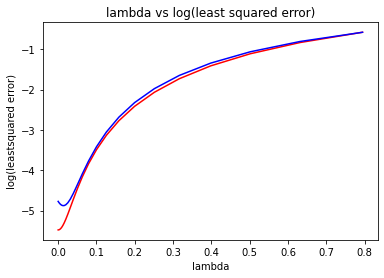

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_csv(fileIn):
    return pd.read_csv(fileIn, header=None)

X_frame = read_csv("3/hw1_ridge_x.dat")
y_frame = read_csv("3/hw1_ridge_y.dat")

val_X = X_frame.head(10) # validation set
train_X = X_frame.tail(40) # training set
val_Y = y_frame.head(10)
train_Y = y_frame.tail(40)


def ridge_regression(X, y, l):
    n = X.shape[0]  # samples
    m = X.shape[1]  # features

    A = l * np.eye(m) + 1 / n * np.dot(X.T, X)
    b = 1 / n * np.dot(X.T, y)

    theta = np.dot(np.linalg.pinv(A), b)

    return theta.T[0]


lbd = .15
theta = ridge_regression(train_X.values, train_Y.values, lbd)
print(theta)

def calculate_training_error(X, y, theta):
    X = np.mat(X)
    y = np.mat(y)
    theta = np.mat(theta).T
    predicted_y = np.dot(X, theta) # y = X cdot theta
    error = predicted_y - y # err = y - f(theta, x)
    squared_error = np.power(error, 2)
    sum_squared_error = np.sum(squared_error)
    squared_error = sum_squared_error / (2 * X.shape[0])

    return squared_error


train_error = []
val_error = []

lbds = [10**i for i in np.arange(-5, 0, 0.1)]

for lbd in lbds:
    theta = ridge_regression(train_X.values, train_Y.values, lbd)
    train_error.append(
        calculate_training_error(train_X.values, train_Y.values, theta))
    val_error.append(
        calculate_training_error(val_X.values, val_Y.values, theta))

plt.plot(lbds, np.log(train_error), 'r')
plt.plot(lbds, np.log(val_error), 'b')
plt.xlabel('lambda')
plt.ylabel('log(leastsquared error)')
plt.title(f'lambda vs log(least squared error)')

print(f'best lambda: {lbds[np.argmin(val_error)]}')